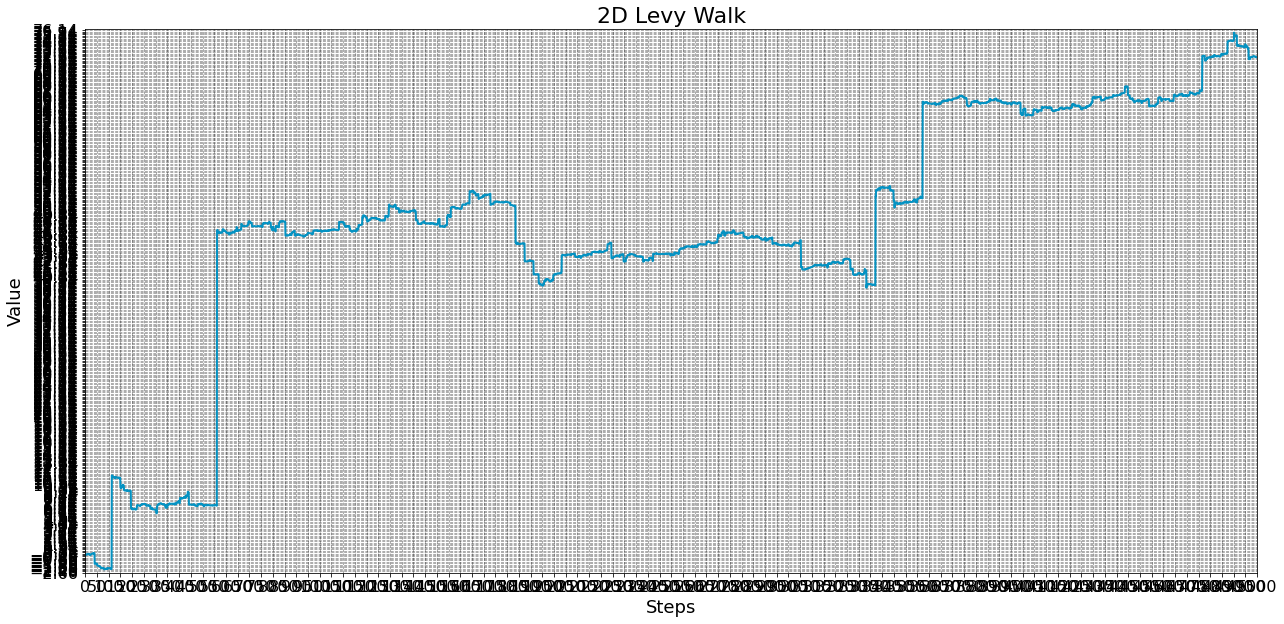

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
from scipy.stats import levy_stable

# set a random seed

def levy_walk(N):
    """
    Simulates a discrete random walk
    :param int N : the number of steps to take
    """
    # event space: set of possible increments
    increments = levy_stable.rvs(alpha=1, beta=0, size=N)
    # the probability to generate 1
    p=0.5
    
    # the epsilon values
    random_increments = np.random.choice(increments, N, p)
    # calculate the random walk
    #cumsum adds to each step increment
    random_walk = np.cumsum(random_increments)
    
    # return the entire walk and the increments
    return random_walk, random_increments

# generate a random walk
N = 5000
R, epsilon = levy_walk(N)

# normalize the random walk using the Central Limit Theorem
R = R * np.sqrt(1./N)


fig = plt.figure(figsize=(21, 10))
ax = plt.axes(xlim=(0, N), ylim=(np.min(R) - 0.5, np.max(R) + 0.5)) 
line, = ax.plot(R, lw=2, color='#0492C2')
ax.set_xticks(np.arange(0, N+1, 50))
ax.set_yticks(np.arange(np.min(R) - 0.5, np.max(R) + 0.5, 0.2))
ax.set_title('2D Levy Walk', fontsize=22)
ax.set_xlabel('Steps', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.tick_params(labelsize=16)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.4)

plt.show()



In [28]:
# fig = plt.figure(figsize=(21, 10))
# ax = plt.axes(xlim=(0, N), ylim=(np.min(R) - 0.5, np.max(R) + 0.5)) 
# line, = ax.plot([], [], lw=2, color='#0492C2')
# ax.set_xticks(np.arange(0, N+1, 50))
# ax.set_yticks(np.arange(np.min(R) - 0.5, np.max(R) + 0.5, 0.2))
# ax.set_title('2D Random Walk', fontsize=22)
# ax.set_xlabel('Steps', fontsize=18)
# ax.set_ylabel('Value', fontsize=18)
# ax.tick_params(labelsize=16)
# ax.grid(True, which='major', linestyle='--', color='black', alpha=0.4)

# # initialization function 
# def init(): 
#     # creating an empty plot/frame 
#     line.set_data([], []) 
#     return line, 

# # lists to store x and y axis points 
# xdata, ydata = [], []

# # animation function 
# def animate(i):
#     # x, y values to be plotted 
#     y = R[i] 
    
#     # appending new points to x, y axes points list 
#     xdata.append(i) 
#     ydata.append(y) 
#     line.set_data(xdata, ydata) 
#     return line,

# # call the animator	 
# anim = animation.FuncAnimation(fig, animate, init_func=init, frames=N, interval=20, blit=True)
# # save the animation as mp4 video file 
# anim.save('levy_walk.gif',writer='imagemagick') 

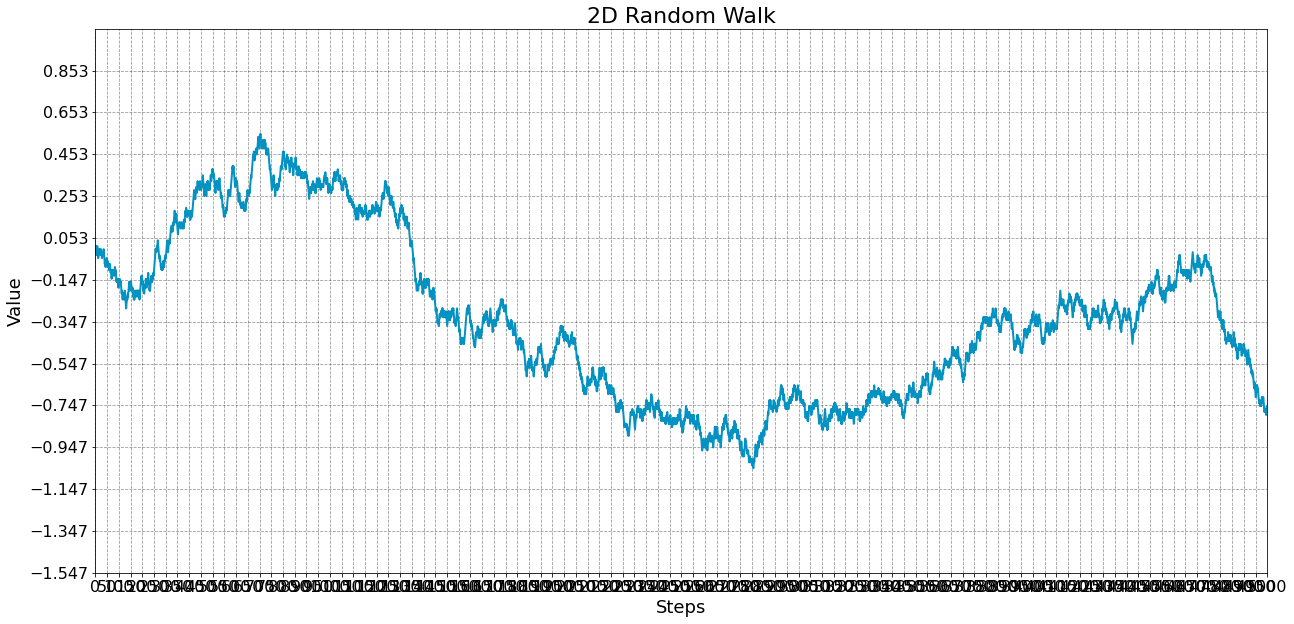

In [31]:
def random_walk(N):
    """
    Simulates a discrete random walk
    :param int N : the number of steps to take
    """
    # event space: set of possible increments
    increments = np.array([1, -1])
    # the probability to generate 1
    p=0.5
    
    # the epsilon values
    random_increments = np.random.choice(increments, N, p)
    # calculate the random walk
    random_walk = np.cumsum(random_increments)
    
    # return the entire walk and the increments
    return random_walk, random_increments

# generate a random walk
N = 5000
R, epsilon = random_walk(N)

# normalize the random walk using the Central Limit Theorem
R = R * np.sqrt(1./N)


fig = plt.figure(figsize=(21, 10))
ax = plt.axes(xlim=(0, N), ylim=(np.min(R) - 0.5, np.max(R) + 0.5)) 
line, = ax.plot(R, lw=2, color='#0492C2')
ax.set_xticks(np.arange(0, N+1, 50))
ax.set_yticks(np.arange(np.min(R) - 0.5, np.max(R) + 0.5, 0.2))
ax.set_title('2D Random Walk', fontsize=22)
ax.set_xlabel('Steps', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.tick_params(labelsize=16)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.4)

plt.show()

In [32]:
# fig = plt.figure(figsize=(21, 10))
# ax = plt.axes(xlim=(0, N), ylim=(np.min(R) - 0.5, np.max(R) + 0.5)) 
# line, = ax.plot([], [], lw=2, color='#0492C2')
# ax.set_xticks(np.arange(0, N+1, 50))
# ax.set_yticks(np.arange(np.min(R) - 0.5, np.max(R) + 0.5, 0.2))
# ax.set_title('2D Random Walk', fontsize=22)
# ax.set_xlabel('Steps', fontsize=18)
# ax.set_ylabel('Value', fontsize=18)
# ax.tick_params(labelsize=16)
# ax.grid(True, which='major', linestyle='--', color='black', alpha=0.4)

# # initialization function 
# def init(): 
#     # creating an empty plot/frame 
#     line.set_data([], []) 
#     return line, 

# # lists to store x and y axis points 
# xdata, ydata = [], []

# # animation function 
# def animate(i):
#     # x, y values to be plotted 
#     y = R[i] 
    
#     # appending new points to x, y axes points list 
#     xdata.append(i) 
#     ydata.append(y) 
#     line.set_data(xdata, ydata) 
#     return line,

# # call the animator	 
# anim = animation.FuncAnimation(fig, animate, init_func=init, frames=N, interval=20, blit=True)
# # save the animation as mp4 video file 
# anim.save('random_walk.gif',writer='imagemagick') 